## Notebook presents the collected data from different perspectives:
- PART 1: Plots showing the dependency of infections/deaths caused by COVID19 and vaccination percentage in counties.
- PART 2: Plots showing the dependency of infections/deaths caused by COVID19 and vaccination percentage in counties and visualizing the population size or population density by the size of the points.
- PART 3: Three plots which represent the whole data cut into 3 parts, dependent on either 'Population' or 'Population Density' properties. The two cutoff points can be define below.
- PART 4: Data is also cut off like PART 3, but it is in one plot and instead colors are used

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Data file [from here data is read from]
filename = 'data/vax_cases_deaths.csv'

In [45]:
#Path to save figures
path = "figures/"

In [46]:
# This iformation is needed for the title of the figures. THE PERIOD MUST BE SAME AS IN FILE 'Vax_cases_deaths.ipynb' or you can only fill period_start with a custom name and leave period_end blank
period_start = '12/15/2021'
period_end = '01/01/2022'
days_in_the_period = 276

### Choose the maximum and minimum population size of counties taken into consideration
The cases and deaths will be shown per 10000 inhabitants

In [47]:
pop_min = 1000
pop_max = 100000000000000

### Choose cutoff points for part 3 and the property on which the plots will be dependent, either 'Population' or 'Population Density'

In [48]:
plot_dep = 'Population Density' #'Population'

cut_point1 = 100
cut_point2 = 12000

### Choose what you want to see on x and y axis
- X axis: 'Percentage of fully vaccinated' or 'Percentage of vaccinated with booster'
- Y axis: 'Infections per 10k inhabitants' or 'Deaths per 10k inhabitants'

In [84]:
x_name = 'Percentage of fully vaccinated'
y_name = 'Infections per 10k inhabitants'

### Reading the file and processing/ cleaning the data

In [85]:
df_all = pd.read_csv(filename)

In [86]:
#Clean and filter the data
filter_pop = df_all[ (df_all['Population'] > pop_min) & (df_all['Population'] < pop_max) ]
filter_pop = filter_pop[ filter_pop['Complete_pct_end'] != 0 ]
filter_pop = filter_pop[ filter_pop['Deaths_begin'] < filter_pop['Deaths_end'] ]
filter_pop = filter_pop[ filter_pop['Cases_begin'] < filter_pop['Cases_end'] ]
#filter_cases = filter_cases[ filter_cases['Cases_diff'] > 10 ]

filter_pop['Infections per 10k inhabitants'] = ((filter_pop['Cases in given period'])*10000/filter_pop['Population'])
filter_pop['Deaths per 10k inhabitants'] = ((filter_pop['Deaths in given period'])*10000/filter_pop['Population'])

### Part 1

/home/joanna_len/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Infections per 10k inhabitants')

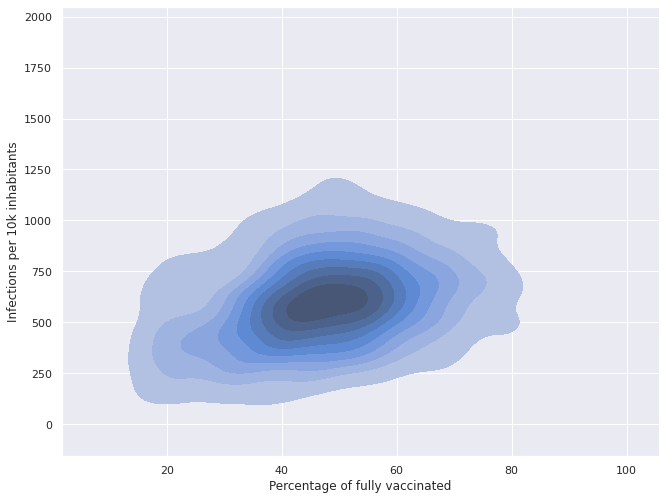

In [87]:
#Present the data of number of deaths caused by COVID19 against percentage of fully vaccinated
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.kdeplot(filter_pop[x_name], filter_pop[y_name], fill=True)
plt.xlabel(x_name)
plt.ylabel(y_name)
#plt.savefig(path + x_name.replace(" ","") + '_' + y_name.replace(" ","") + "_" + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

### Part 2

<AxesSubplot:xlabel='Percentage of fully vaccinated', ylabel='Infections per 10k inhabitants'>

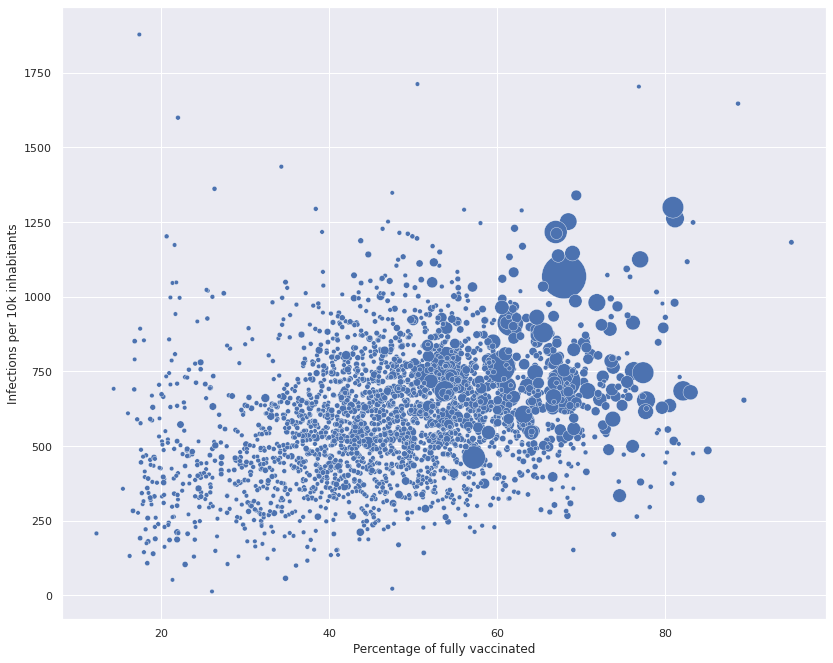

In [88]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x=x_name, y=y_name, size="Population", legend=False, sizes=(20, 2000))

<AxesSubplot:xlabel='Percentage of fully vaccinated', ylabel='Infections per 10k inhabitants'>

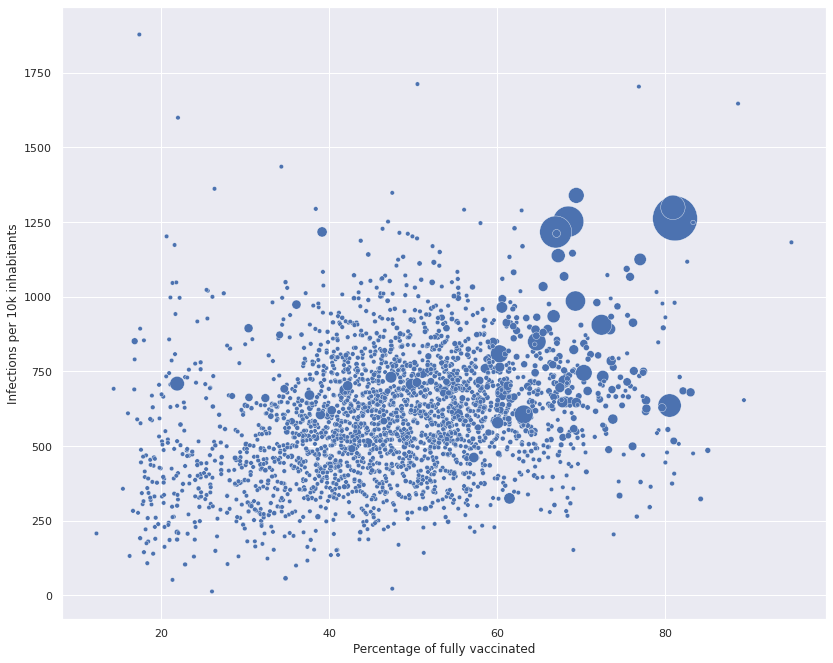

In [89]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x=x_name, y=y_name, size="Population Density", legend=False, sizes=(20, 2000))

### Part 3. Here are shown 3 plots which represent the whole data cut into 3 parts, based on given above propery ('Population' or 'Population Density').

[Text(0.5, 1.0, 'Population Density: above 12000')]

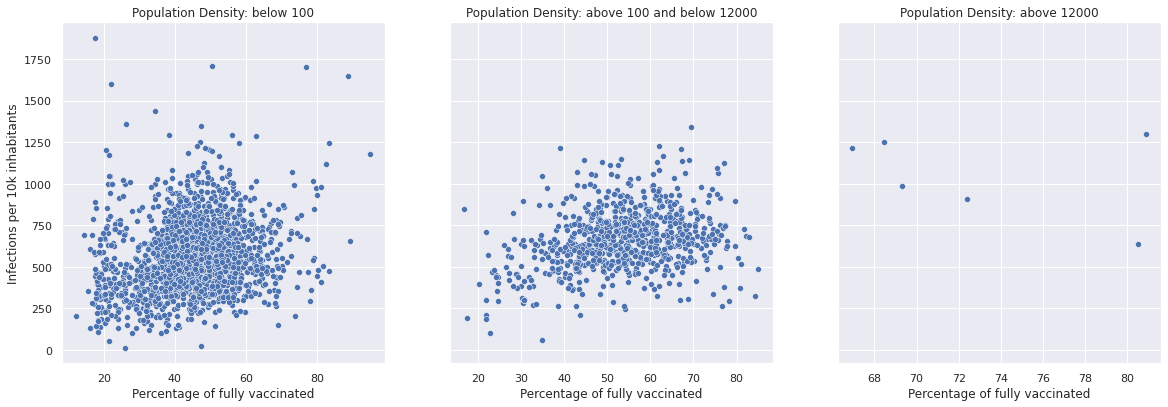

In [90]:
sns.set(rc={'figure.figsize':(19.7,6.27)})
fig, axs = plt.subplots(1,3,  sharey=True)
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= filter_pop[plot_dep].min()) & (filter_pop[plot_dep] < cut_point1) ], x=x_name, y=y_name, legend=False, sizes=(5, 500), alpha=1, ax=axs[0]).set(title = plot_dep + ': below ' + str(cut_point1))
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= cut_point1) & (filter_pop[plot_dep] < cut_point2) ], x=x_name, y=y_name, legend=False, sizes=(5, 500), alpha=1, ax=axs[1]).set(title = plot_dep + ': above ' + str(cut_point1) + ' and below ' + str(cut_point2))
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= cut_point2) & (filter_pop[plot_dep] < filter_pop[plot_dep].max()) ], x=x_name, y=y_name, legend=False, sizes=(5, 500), alpha=1, ax=axs[2]).set(title = plot_dep + ': above ' + str(cut_point2))

### Part 4. Here data is coloured based cutoff points of a given property 

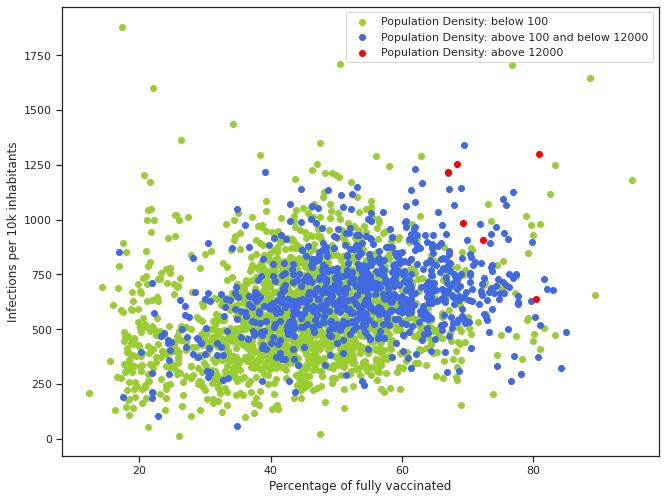

In [91]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.set_style(style='white')
sns.set_style('ticks')
data1 = filter_pop[ (filter_pop[plot_dep] >= filter_pop[plot_dep].min()) & (filter_pop[plot_dep] < cut_point1) ]
plt.scatter(data1[x_name], data1[y_name], color='yellowgreen', label=plot_dep + ': below ' + str(cut_point1))
data2 = filter_pop[ (filter_pop[plot_dep] >= cut_point1) & (filter_pop[plot_dep] < cut_point2) ]
plt.scatter(data2[x_name], data2[y_name], color='royalblue', label=plot_dep + ': above ' + str(cut_point1) + ' and below ' + str(cut_point2))
data3 = filter_pop[ (filter_pop[plot_dep] >= cut_point2) & (filter_pop[plot_dep] < filter_pop[plot_dep].max()) ]
plt.scatter(data3[x_name], data3[y_name], color='red', label=plot_dep + ': above ' + str(cut_point2))
plt.xlabel(x_name)
plt.ylabel(y_name)
#plt.xticks([0,20,40,60,80,100])
plt.legend()
#plt.savefig(path + 'fig_deaths_all.png')

### Part 5. Analysis of specific cases

In [92]:
# Blaine county (Idaho)
pd.set_option('display.max_columns', None)
filter_pop[filter_pop["countyFIPS"] == 16013]

,countyFIPS,County Name,State,Population,Land Area in square miles,Population Density,Cases_begin,Cases_end,Deaths_begin,Deaths_end,Booster_begin,Booster_end,Booster_pct_begin,Booster_pct_end,Booster18_begin,Booster18_end,Booster18_pct_begin,Booster18_pct_end,Booster65_begin,Booster65_end,Booster65_pct_begin,Booster65_pct_end,Complete_begin,Complete_end,Complete_pct_begin,Complete_pct_end,Complete18_begin,Complete18_end,Complete18_pct_begin,Complete18_pct_end,Complete65_begin,Complete65_end,Complete65_pct_begin,Complete65_pct_end,Cases in given period,Deaths in given period,Percentage of fully vaccinated,Percentage of vaccinated with booster,Infections per 10k inhabitants,Deaths per 10k inhabitants
552,16013,Blaine County,ID,23021,2643.59,8.708234,3249,4826,27,28,6566.0,8816.0,40.7,47.6,6566.0,8815.0,40.7,53.0,3175.0,3547.0,65.9,73.2,16140.0,18503.0,70.1,80.4,16135.0,16625.0,88.8,91.5,4818.0,4846.0,95.0,95.0,1577,1,75.25,44.15,685.026715,0.434386


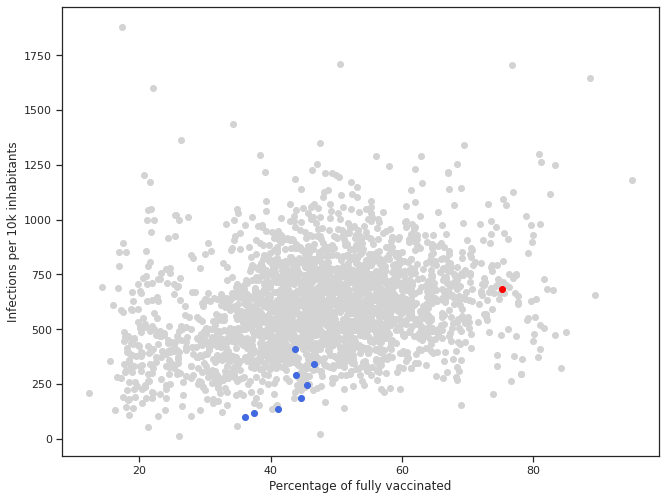

In [93]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.set_style(style='white')
sns.set_style('ticks')
plt.scatter(filter_pop[x_name], filter_pop[y_name], color="lightgray")
blaine = filter_pop[filter_pop["countyFIPS"] == 16013]
blaine_neighbours = filter_pop[filter_pop["countyFIPS"].isin([16039, 16025, 16067, 16037, 16077, 16031, 16023, 16011, 16063])] #Neighbor counties with no data: Butte, Bingham, Lincoln
plt.scatter(blaine[x_name], blaine[y_name], color="red")
plt.scatter(blaine_neighbours[x_name], blaine_neighbours[y_name], color="royalblue")
plt.xlabel(x_name)
plt.ylabel(y_name)
#plt.savefig(path + 'fig_deaths_blaine.png')
#plt.savefig(path + 'fig_cases_blaine.png')

### Outliers

In [17]:
#for December/January analysis

#filter_pop[(filter_pop['Infections per 10k inhabitants'] > 1500) & (filter_pop['Percentage of fully vaccinated'] > 60) | (filter_pop['Infections per 10k inhabitants'] > 1000) & (filter_pop['Percentage of fully vaccinated'] > 90)].to_csv("outliers_decjan.csv")

In [18]:
#for May - January analysis

#filter_pop[ (filter_pop['Percentage of fully vaccinated'] > 90)].to_csv("outlier_mayjan.csv")

Text(0, 0.5, 'Infections per 10k inhabitants')

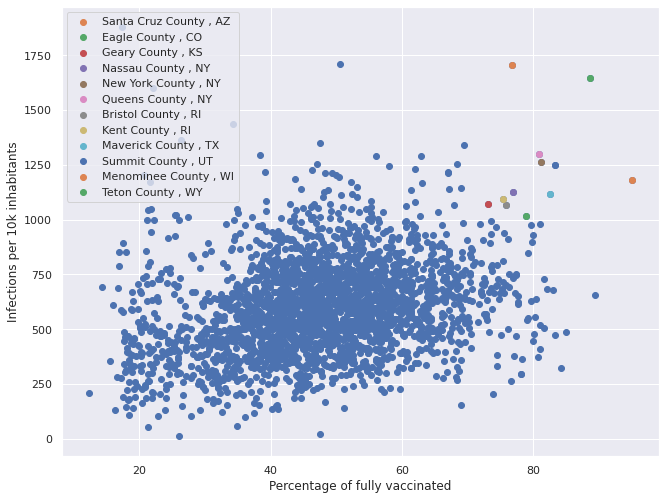

In [19]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_pop[x_name], filter_pop[y_name], alpha = 1)
outliers = filter_pop[(filter_pop['Infections per 10k inhabitants'] > 1000) & (filter_pop['Percentage of fully vaccinated'] > 70) | (filter_pop['Infections per 10k inhabitants'] > 1000) & (filter_pop['Percentage of fully vaccinated'] > 90)]



for i, (x,y) in enumerate(zip(outliers[x_name], outliers[y_name])):
    plt.scatter(x, y, label = list(outliers['County Name'])[i] + ", " + list(outliers['State'])[i])
plt.legend()
plt.xlabel(x_name)
plt.ylabel(y_name)
#plt.savefig(path + 'fig9.png')

Text(0, 0.5, 'Infections per 10k inhabitants')

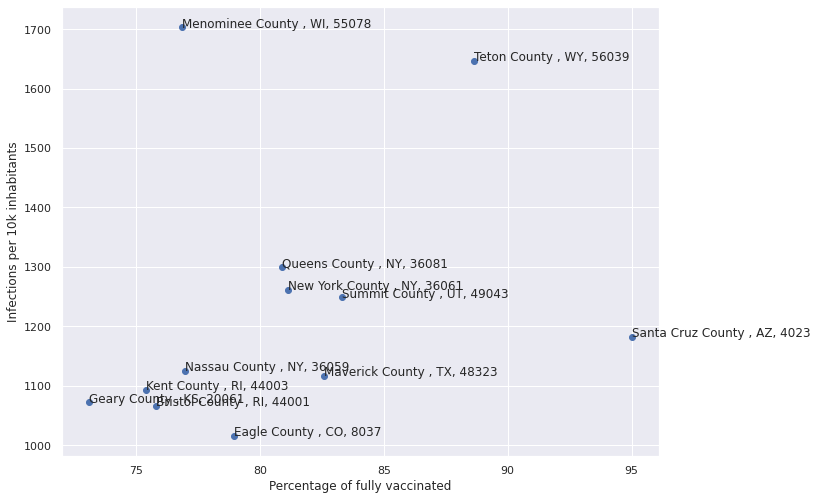

In [20]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
outliers = filter_pop[(filter_pop['Infections per 10k inhabitants'] > 1000) & (filter_pop['Percentage of fully vaccinated'] > 70) | (filter_pop['Infections per 10k inhabitants'] > 1000) & (filter_pop['Percentage of fully vaccinated'] > 90)]


plt.scatter(outliers[x_name], outliers[y_name])
for i, (x,y) in enumerate(zip(outliers[x_name], outliers[y_name])):
    plt.annotate(list(outliers['County Name'])[i] + ", " + list(outliers['State'])[i] + ", " + str(list(outliers['countyFIPS'])[i]), (x, y), fontsize=12)
plt.xlabel(x_name)
plt.ylabel(y_name)
#plt.savefig(path + 'fig10.png')

### Top 10 largest Ski Resorts in the USA
1.	Powder Mountain [Weber county, Utah, FIPS: 49057]
2.	Park City [Summit County, Utah, FIPS: 49043]
3.	Palisades Tahoe [Placer County, California, FIPS: 06061]
4.	Big Sky Resort [Madison County, MT, FIPS: 30057 / Gallatin County, Montana, FIPS: 30031]
5.	Vail [Eagle County, Colorado, FIPS: 08037]
6.	Heavenly [El Dorado County, California, 06017 / Douglas County, Nevada, 32005/Alpine County, California, 06003]
7.	Mt Bachelor [Deschutes County, Oregon, 41017]
8.	Aspen Snowmass [Pitkin County, Colorado, 08097]
9.	Aspen Mountain [Pitkin County, Colorado, 08097]
10.	Mammoth Mountain [Mono County, California, 06051]

In [21]:
fips_ski = [49057, 49043, 6061, 30057, 30031, 8037, 6017, 32005, 6003, 41017, 8097, 6051]

Text(0, 0.5, 'Infections per 10k inhabitants')

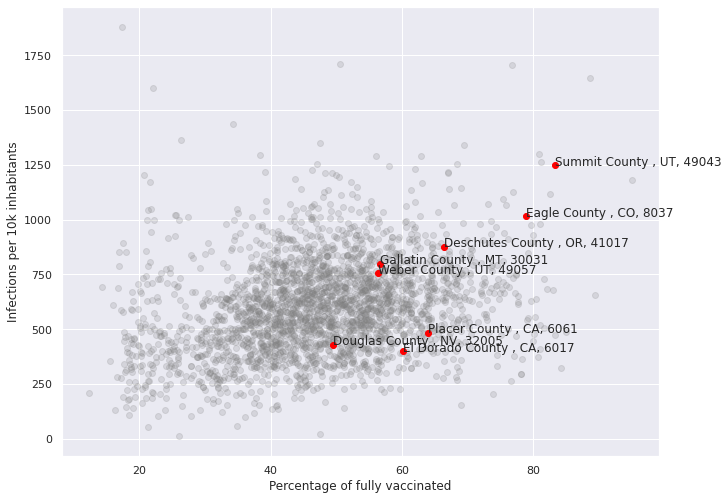

In [22]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_pop[x_name], filter_pop[y_name], color="gray", alpha=0.2)
ski_resorts = filter_pop[filter_pop["countyFIPS"].isin(fips_ski)]
plt.scatter(ski_resorts[x_name], ski_resorts[y_name], color="red")
for i, (x,y) in enumerate(zip(ski_resorts[x_name], ski_resorts[y_name])):
    plt.annotate(list(ski_resorts['County Name'])[i] + ", " + list(ski_resorts['State'])[i] + ", " + str(list(ski_resorts['countyFIPS'])[i]), (x, y))
plt.xlabel(x_name)
plt.ylabel(y_name)
#plt.savefig(path + 'fig11.png')

### Counties with ski resorts
1. Summit County - Colorado [FIPS: 08117]
2. Eagle County - Colorado [FIPS: 08037]
3. Pitkin County - Colorado [FIPS: 08097]
4. San Miguel County - Colorado [FIPS: 08113]
5. Summit County - Utah [FIPS: 49043]
6. Teton County - Wyoming [FIPS: 56039]
7. Gallatin County and Madison County - Montana [FIPS: 30031, FIPS: 30057]
8. Fresno County - Pallisades California [FIPS: 06019]
9. Blaine County -  Idaho [FIPS: 16013]
10. Taos County - New Mexico [FIPS: 35055]

In [23]:
fips_ski = [8117, 8037, 8097, 8113, 49043, 56039, 30031, 30057, 6019, 16013, 35055]

Text(0, 0.5, 'Infections per 10k inhabitants')

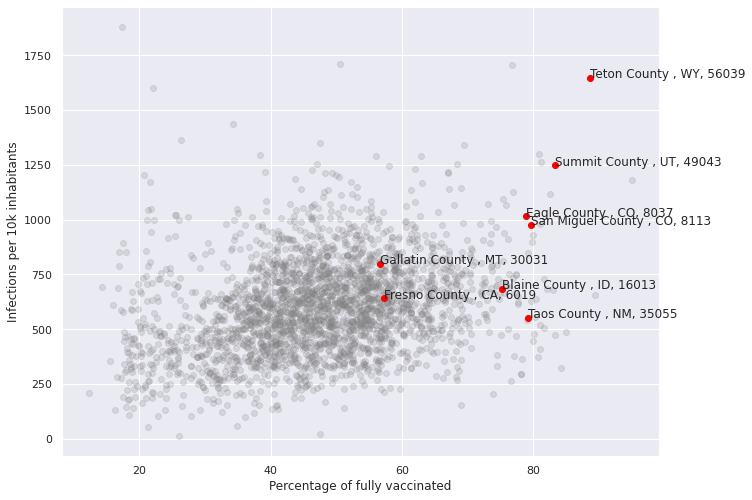

In [24]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_pop[x_name], filter_pop[y_name], color="gray", alpha=0.2)
ski_resorts = filter_pop[filter_pop["countyFIPS"].isin(fips_ski)]
plt.scatter(ski_resorts[x_name], ski_resorts[y_name], color="red")
for i, (x,y) in enumerate(zip(ski_resorts[x_name], ski_resorts[y_name])):
    plt.annotate(list(ski_resorts['County Name'])[i] + ", " + list(ski_resorts['State'])[i] + ", " + str(list(ski_resorts['countyFIPS'])[i]), (x, y))
plt.xlabel(x_name)
plt.ylabel(y_name)
#plt.savefig(path + 'fig11.png')

### Part 6. Is the percentage of vaccinated with booster anyhow depends on density of population?

Text(0, 0.5, 'Population Density')

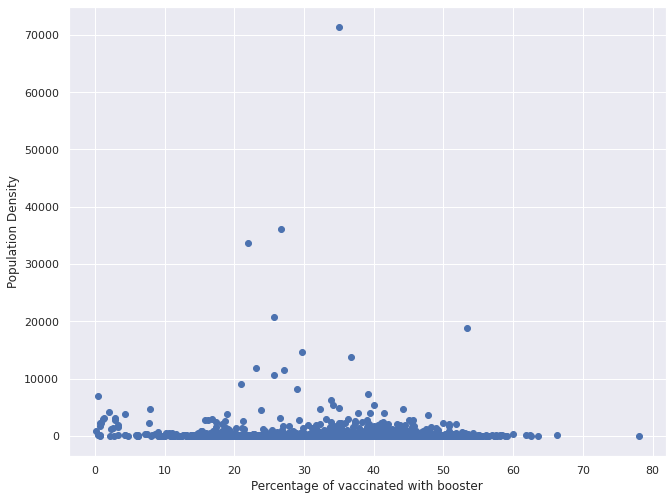

In [25]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_pop['Percentage of vaccinated with booster'], filter_pop['Population Density'])
plt.xlabel('Percentage of vaccinated with booster')
plt.ylabel('Population Density')
#plt.savefig(path + 'fig16.png')

Text(0, 0.5, 'Population Density')

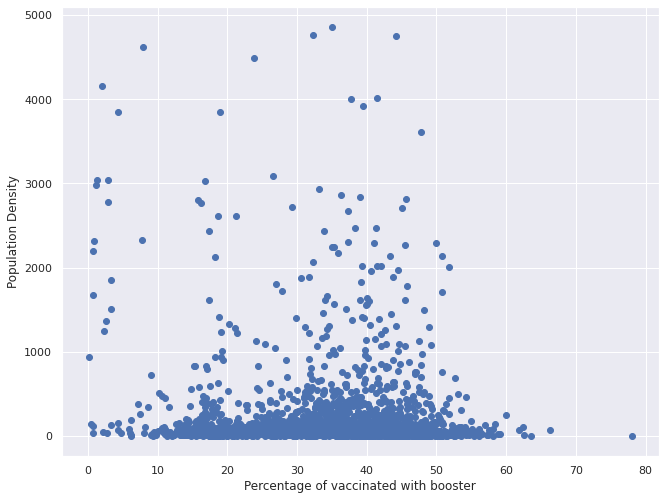

In [26]:
#For densities below 5000
filter_dens = filter_pop[ filter_pop['Population Density'] < 5000 ]
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_dens['Percentage of vaccinated with booster'], filter_dens['Population Density'])
plt.xlabel('Percentage of vaccinated with booster')
plt.ylabel('Population Density')
#plt.savefig(path + 'fig17.png')